# LOAN APPLICATION PREDICTION

In [44]:
%pip install pandas numpy matplotlib seaborn scikit-learn statsmodels gdown scorecardpy 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scorecardpy import woebin, iv
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt

In [46]:
import gdown
url = "https://drive.google.com/file/d/173jEzB2QemADN1Ramj7iPWmTrzbaini6/view?usp=sharing"
output = "loan_application.csv"

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=173jEzB2QemADN1Ramj7iPWmTrzbaini6
To: c:\Users\ADMIN\OneDrive\Tài liệu\CV\loan_application.csv
100%|██████████| 563k/563k [00:00<00:00, 1.81MB/s]


'loan_application.csv'

In [47]:
df_application = pd.read_csv("loan_application.csv" )
print(df_application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UID              8847 non-null   int64 
 1   ApplicationDate  8847 non-null   object
 2   Amount           8847 non-null   int64 
 3   Term             8847 non-null   int64 
 4   EmploymentType   8847 non-null   object
 5   LoanPurpose      8847 non-null   object
 6   Success          8847 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 483.9+ KB
None


In [48]:
url = "https://drive.google.com/file/d/1oK-tQrJcKcik_UfWXfTfBq0xDuEaTgRF/view?usp=sharing"
output = "credit_features_subset.csv"

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1oK-tQrJcKcik_UfWXfTfBq0xDuEaTgRF
To: c:\Users\ADMIN\OneDrive\Tài liệu\CV\credit_features_subset.csv
100%|██████████| 434k/434k [00:00<00:00, 2.40MB/s]


'credit_features_subset.csv'

In [49]:
features = pd.read_csv("credit_features_subset.csv")
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

In [50]:
url = "https://drive.google.com/file/d/1xjbzXIMxyQLcEvb0QnqicKOaZMftcBqt/view?usp=sharing"
output = "loan_data_dictionary.csv"

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1xjbzXIMxyQLcEvb0QnqicKOaZMftcBqt
To: c:\Users\ADMIN\OneDrive\Tài liệu\CV\loan_data_dictionary.csv
100%|██████████| 980/980 [00:00<00:00, 1.99MB/s]


'loan_data_dictionary.csv'

In [51]:
dictionary =  pd.read_csv("loan_data_dictionary.csv")
print(dictionary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         20 non-null     object
 1   Description  20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes
None


In [52]:
# Merge trên UID
data = pd.merge(df_application, features, on='UID', how='inner')

# Định nghĩa TARGET: bad=1 nếu Success=0 (rủi ro cao)
data['TARGET'] = 1 - data['Success']

# Drop cột không cần (UID, ApplicationDate - trừ khi dùng time-based split)
data = data.drop(['UID', 'Success', 'ApplicationDate'], axis=1)

# Schema từ dictionary
print("Schema:")
print(dictionary)

Schema:
                                    Name  \
0                                    UID   
1                       Application Date   
2                                 Amount   
3                                   Term   
4                        Employment Type   
5                            LoanPurpose   
6                                Success   
7                 ALL_AgeOfOldestAccount   
8               ALL_AgeOfYoungestAccount   
9                              ALL_Count   
10                       ALL_CountActive   
11           ALL_CountClosedLast12Months   
12              ALL_CountDefaultAccounts   
13           ALL_CountOpenedLast12Months   
14                      ALL_CountSettled   
15                    ALL_MeanAccountAge   
16          ALL_SumCurrentOutstandingBal   
17    ALL_SumCurrentOutstandingBalExcMtg   
18        ALL_TimeSinceMostRecentDefault   
19  ALL_WorstPaymentStatusActiveAccounts   

                                          Description  
0          

In [53]:
# Thống kê mô tả + check null
def check_null(df):
    return df.isnull().sum() / len(df) * 100  # % null

print("Describe:")
print(data.describe())

print("Null %:")
print(check_null(data))

Describe:
             Amount         Term  ALL_AgeOfOldestAccount  \
count   8847.000000  8847.000000             8847.000000   
mean    7560.692438    41.985080              162.694021   
std     5309.138911    16.139168               94.569878   
min      500.000000    12.000000               -1.000000   
25%     3000.000000    24.000000              100.000000   
50%     6500.000000    48.000000              151.000000   
75%    10000.000000    60.000000              212.000000   
max    20000.000000    60.000000              999.000000   

       ALL_AgeOfYoungestAccount    ALL_Count  ALL_CountActive  \
count               8847.000000  8847.000000      8847.000000   
mean                   8.587431    17.515316         9.258506   
std                   13.081866    13.900171         4.896900   
min                   -1.000000     0.000000        -1.000000   
25%                    2.000000     9.000000         6.000000   
50%                    5.000000    15.000000         9.0000

In [54]:
# Xử lý null (impute median cho numerical, mode cho categorical; tùy risk, drop nếu >20% null)
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Encoding categorical (one-hot cho EmploymentType, LoanPurpose)
data = pd.get_dummies(data, columns=['EmploymentType', 'LoanPurpose'], drop_first=True)

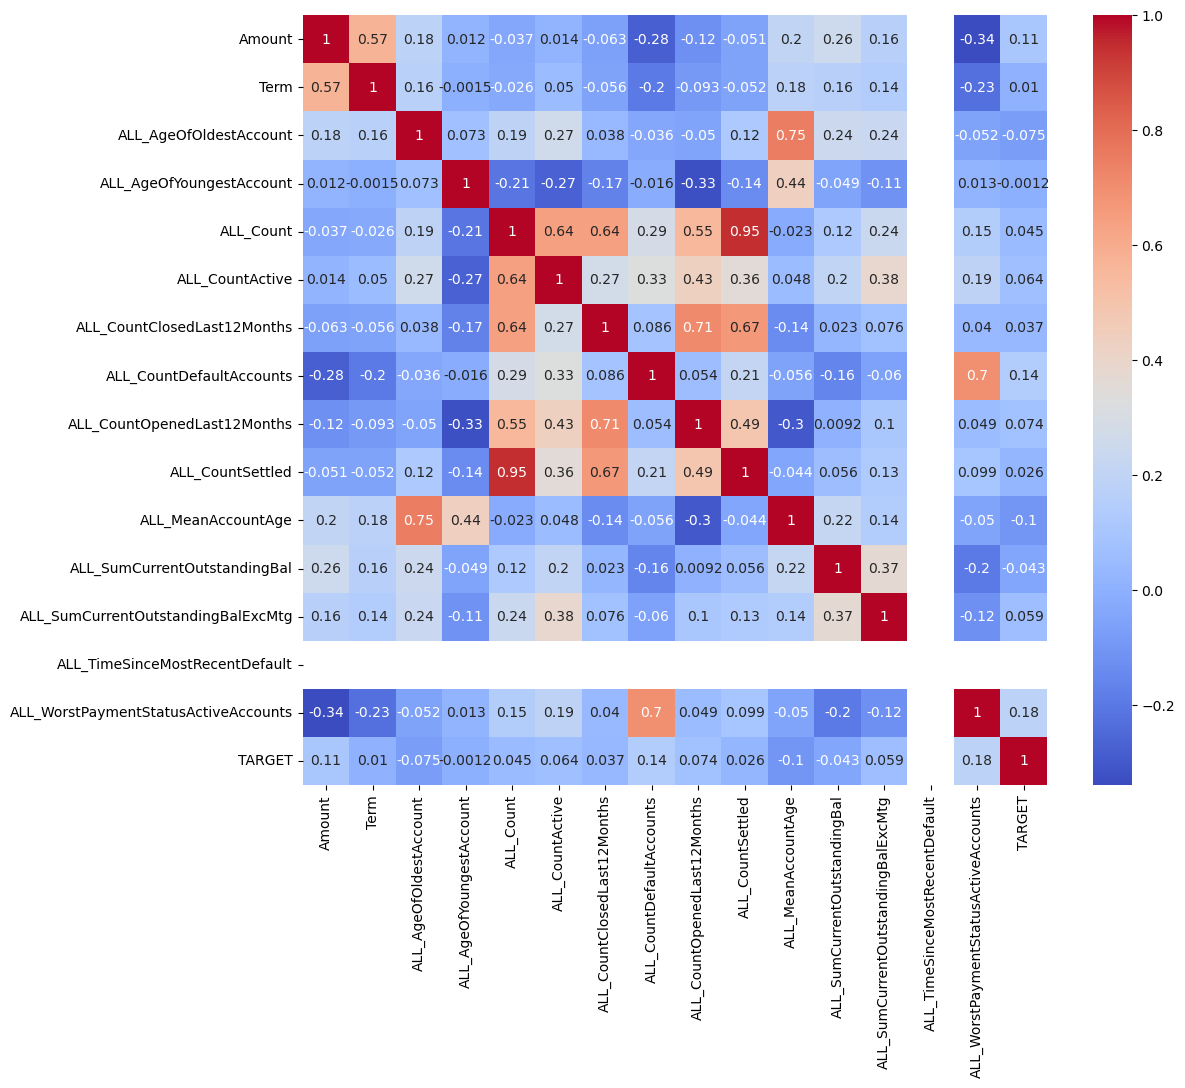

Biến có correlation cao với TARGET (>0.7):
Series([], Name: TARGET, dtype: float64)

Cặp biến có correlation cao lẫn nhau (>0.7):
                          Var1                         Var2  Correlation
0       ALL_AgeOfOldestAccount           ALL_MeanAccountAge     0.752615
1                    ALL_Count             ALL_CountSettled     0.945326
2  ALL_CountClosedLast12Months  ALL_CountOpenedLast12Months     0.713449
3  ALL_CountOpenedLast12Months  ALL_CountClosedLast12Months     0.713449
4             ALL_CountSettled                    ALL_Count     0.945326
5           ALL_MeanAccountAge       ALL_AgeOfOldestAccount     0.752615


In [55]:
# Lọc các cột numerical (trừ TARGET)
numerical_cols = data.select_dtypes(include=[np.number]).columns
corr_data = data[numerical_cols]

# Tính correlation
corr = corr_data.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Loại biến corr cao với TARGET (>0.7) hoặc lẫn nhau
# Lấy correlation tuyệt đối với TARGET
target_corr = corr['TARGET'].abs()

# Tìm các biến có corr > 0.7 với TARGET (trừ chính nó)
high_corr_with_target = target_corr[target_corr > 0.7].drop('TARGET')

# Tìm các cặp biến corr cao lẫn nhau (>0.7)
high_corr_pairs = corr[(corr.abs() > 0.7) & (corr != 1)].stack().reset_index()
high_corr_pairs.columns = ['Var1', 'Var2', 'Correlation']

print("Biến có correlation cao với TARGET (>0.7):")
print(high_corr_with_target)

print("\nCặp biến có correlation cao lẫn nhau (>0.7):")
print(high_corr_pairs)

In [56]:
def calculate_woe_iv(df, feature, target, bins=5):
    df['bin'] = pd.qcut(df[feature], q=bins, duplicates='drop')
    grouped = df.groupby('bin', observed=False)[target].agg(['count', 'sum'])
    grouped['good'] = grouped['count'] - grouped['sum']
    grouped['bad_rate'] = grouped['sum'] / grouped['count']
    total_good = grouped['good'].sum()
    total_bad = grouped['sum'].sum()
    grouped['woe'] = np.log((grouped['good']/total_good) / (grouped['sum']/total_bad + 1e-6))
    grouped['iv'] = (grouped['good']/total_good - grouped['sum']/total_bad) * grouped['woe']
    iv_total = grouped['iv'].sum()
    return grouped, iv_total

# Tính IV cho tất cả numerical vars
iv_dict = {}
for col in numerical_cols:
    if col != 'TARGET':
        _, iv_val = calculate_woe_iv(data, col, 'TARGET')
        iv_dict[col] = iv_val

iv_df = pd.DataFrame(iv_dict.items(), columns=['Feature', 'IV']).sort_values('IV', ascending=False)
print(iv_df)

# Chốt biến: IV > 0.1, và check WoE monotonic (tăng/giảm dần theo bin)
selected_vars = iv_df[iv_df['IV'] > 0.1]['Feature'].tolist()
print("Selected vars:", selected_vars)

                                 Feature        IV
14  ALL_WorstPaymentStatusActiveAccounts  0.591297
7               ALL_CountDefaultAccounts  0.487988
0                                 Amount  0.436235
10                    ALL_MeanAccountAge  0.191384
5                        ALL_CountActive  0.139706
2                 ALL_AgeOfOldestAccount  0.127452
8            ALL_CountOpenedLast12Months  0.116259
12    ALL_SumCurrentOutstandingBalExcMtg  0.098331
1                                   Term  0.087578
11          ALL_SumCurrentOutstandingBal  0.074741
3               ALL_AgeOfYoungestAccount  0.057589
4                              ALL_Count  0.045084
6            ALL_CountClosedLast12Months  0.027446
9                       ALL_CountSettled  0.017777
13        ALL_TimeSinceMostRecentDefault  0.000000
Selected vars: ['ALL_WorstPaymentStatusActiveAccounts', 'ALL_CountDefaultAccounts', 'Amount', 'ALL_MeanAccountAge', 'ALL_CountActive', 'ALL_AgeOfOldestAccount', 'ALL_CountOpenedLast12M

In [57]:
X = data[selected_vars]
y = data['TARGET']

# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Add constant
X_train_const = sm.add_constant(X_train)

# Fit model
model = sm.Logit(y_train, X_train_const).fit()

print("Initial model:", model.summary())

# Loại biến: Lặp đến khi p-value < 0.05 và coeff >= 0
while True:
    pvalues = model.pvalues
    params = model.params
    
    # Tìm cột cần loại (p-value > 0.05 hoặc coeff < 0)
    to_drop = []
    if (pvalues > 0.05).any():
        to_drop.extend(pvalues[pvalues > 0.05].index)
    if (params < 0).any():
        to_drop.extend(params[params < 0].index)
    
    # Nếu không có cột nào cần loại, thoát vòng lặp
    if not to_drop:
        break
    
    # Loại cột đầu tiên trong danh sách (tránh lặp vô hạn)
    to_drop = to_drop[0]  # Lấy 1 cột để loại dần
    X_train_const = X_train_const.drop(to_drop, axis=1, errors='ignore')
    
    # Refit model
    model = sm.Logit(y_train, X_train_const).fit()
    print(f"Dropped {to_drop}. New model:", model.summary())

print("Final model:", model.summary())

Optimization terminated successfully.
         Current function value: 0.282476
         Iterations 9
Initial model:                            Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 6192
Model:                          Logit   Df Residuals:                     6184
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Oct 2025   Pseudo R-squ.:                  0.1546
Time:                        23:39:20   Log-Likelihood:                -1749.1
converged:                       True   LL-Null:                       -2069.0
Covariance Type:            nonrobust   LLR p-value:                6.366e-134
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    

In [58]:
# Predict
X_test_const = sm.add_constant(X_test)
train_cols = X_train_const.columns
X_test_const = X_test_const[train_cols]
X_test_const = X_test_const.replace([np.inf, -np.inf], np.nan).fillna(0)
probs = model.predict(X_test_const)

print("Predicted probabilities:", probs)

Predicted probabilities: 5769    0.972637
3328    0.967525
4002    0.935982
8149    0.811891
5633    0.987640
          ...   
6223    0.940587
7451    0.924535
4698    0.967525
6277    0.985603
649     0.994002
Length: 2655, dtype: float64


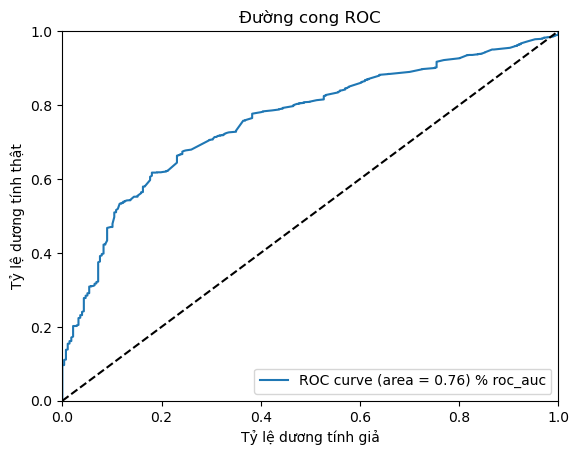

AUC: 0.758753525852201, Gini: 0.517507051704402


In [70]:
# AUC & Gini
from sklearn.metrics import roc_curve, auc

# Tính ROC curve và AUC
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Tính Gini
gini = 2 * roc_auc - 1

# Vẽ ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) % roc_auc')
plt.plot([0, 1], [0, 1], 'k--')  # Đường chéo
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tỷ lệ dương tính giả')
plt.ylabel('Tỷ lệ dương tính thật')
plt.title('Đường cong ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc}, Gini: {gini}")

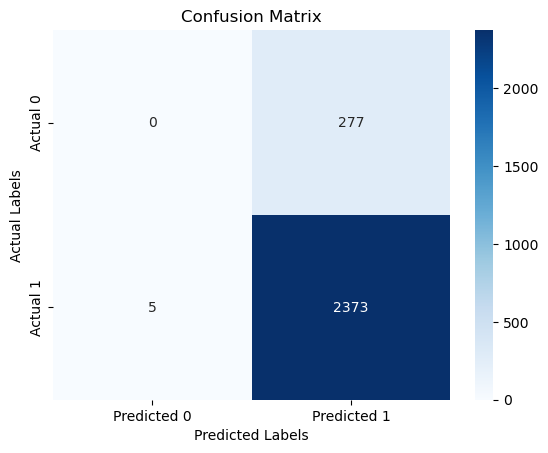

In [64]:
# Confusion Matrix
threshold = 0.5  # Adjust dựa risk appetite
preds = (probs > threshold).astype(int)
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [61]:
# Scorecard
scores = (1 - probs) * 1000
score_df = pd.DataFrame({'TARGET': y_test, 'Prob': probs, 'Score': scores})
print(score_df)

      TARGET      Prob       Score
5769       1  0.972637   27.363166
3328       1  0.967525   32.474721
4002       1  0.935982   64.018126
8149       1  0.811891  188.108978
5633       1  0.987640   12.360286
...      ...       ...         ...
6223       1  0.940587   59.412819
7451       1  0.924535   75.465029
4698       1  0.967525   32.474721
6277       1  0.985603   14.397329
649        1  0.994002    5.997665

[2655 rows x 3 columns]


                  bin  Score_count  TARGET_sum  TARGET_bad_rate
0    (0.0368, 10.421]          267         265         0.992509
1     (10.421, 18.54]          267         260         0.973783
2     (18.54, 30.605]          265         254         0.958491
3    (30.605, 49.368]          263         258         0.980989
4    (49.368, 79.722]          266         253         0.951128
5   (79.722, 106.672]          268         242         0.902985
6  (106.672, 139.919]          306         269         0.879085
7  (139.919, 186.596]          236         183         0.775424
8  (186.596, 242.163]          252         197         0.781746
9  (242.163, 541.158]          265         197         0.743396


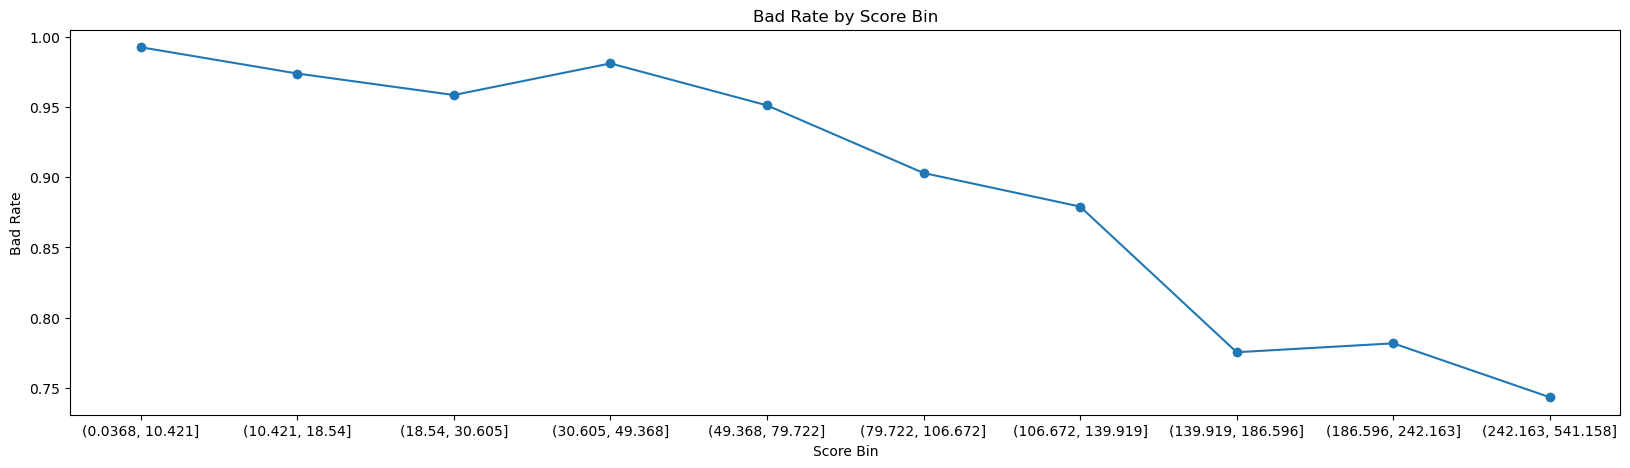

In [62]:
# Bin và bad rate
score_df['bin'] = pd.qcut(score_df['Score'], q=10, duplicates='drop')
summary = score_df.groupby('bin', observed=False).agg({
    'Score': 'count',
    'TARGET': ['sum', lambda x: x.sum() / len(x)]  # Bad count & rate
}).reset_index()

# Đổi tên cột để dễ truy cập (tùy chọn nhưng khuyến khích)
summary.columns = ['bin', 'Score_count', 'TARGET_sum', 'TARGET_bad_rate']

# In summary để kiểm tra
print(summary)

# Plot bad rate vs bin (nên monotonic giảm)
plt.figure(figsize=(20, 5))
plt.plot(summary['bin'].astype(str), summary['TARGET_bad_rate'], marker='o')
plt.title('Bad Rate by Score Bin')
plt.xlabel('Score Bin')
plt.ylabel('Bad Rate')
plt.show()